In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
txtcsv=pd.read_csv("Train_rev1.csv")
txtcsv.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [5]:
df=txtcsv.copy()

In [6]:
df.isnull().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

In [7]:
len(df)

244768

In [8]:
df=df[pd.notnull(df['Title'])]

# Exploratory Data Analysis

In [7]:
print ('Mean Salary is',df['SalaryNormalized'].mean())
print ('Median Salary is',df['SalaryNormalized'].sort_values().median())

Mean Salary is 34122.543349389416
Median Salary is 30000.0


/home/justin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


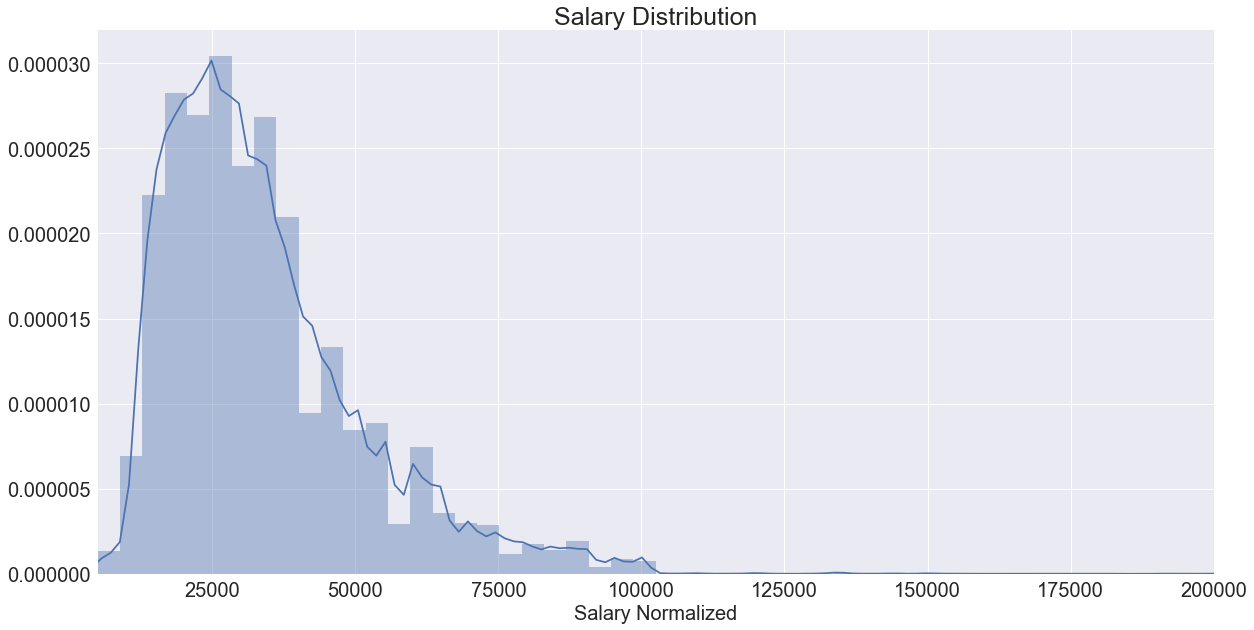

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df["SalaryNormalized"])
plt.title('Salary Distribution',fontsize=25)
plt.xlim(df['SalaryNormalized'].min(),df['SalaryNormalized'].max())
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Salary Normalized', fontsize=20)

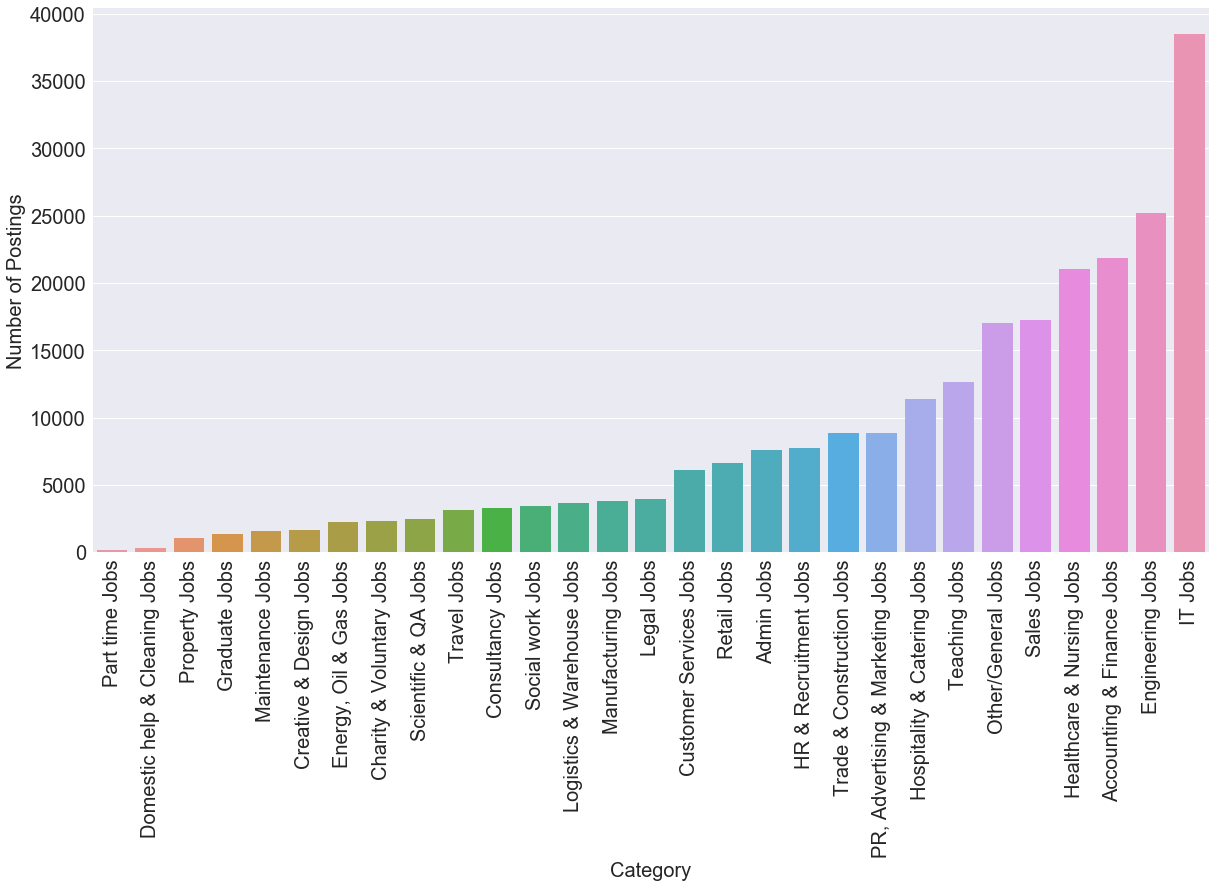

In [71]:
CategoryDF=pd.DataFrame(df.groupby('Category').size().sort_values().reset_index())
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(CategoryDF.iloc[:,0],CategoryDF.iloc[:,1])
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of Postings',fontsize=20)
plt.xlabel('Category',fontsize=20)

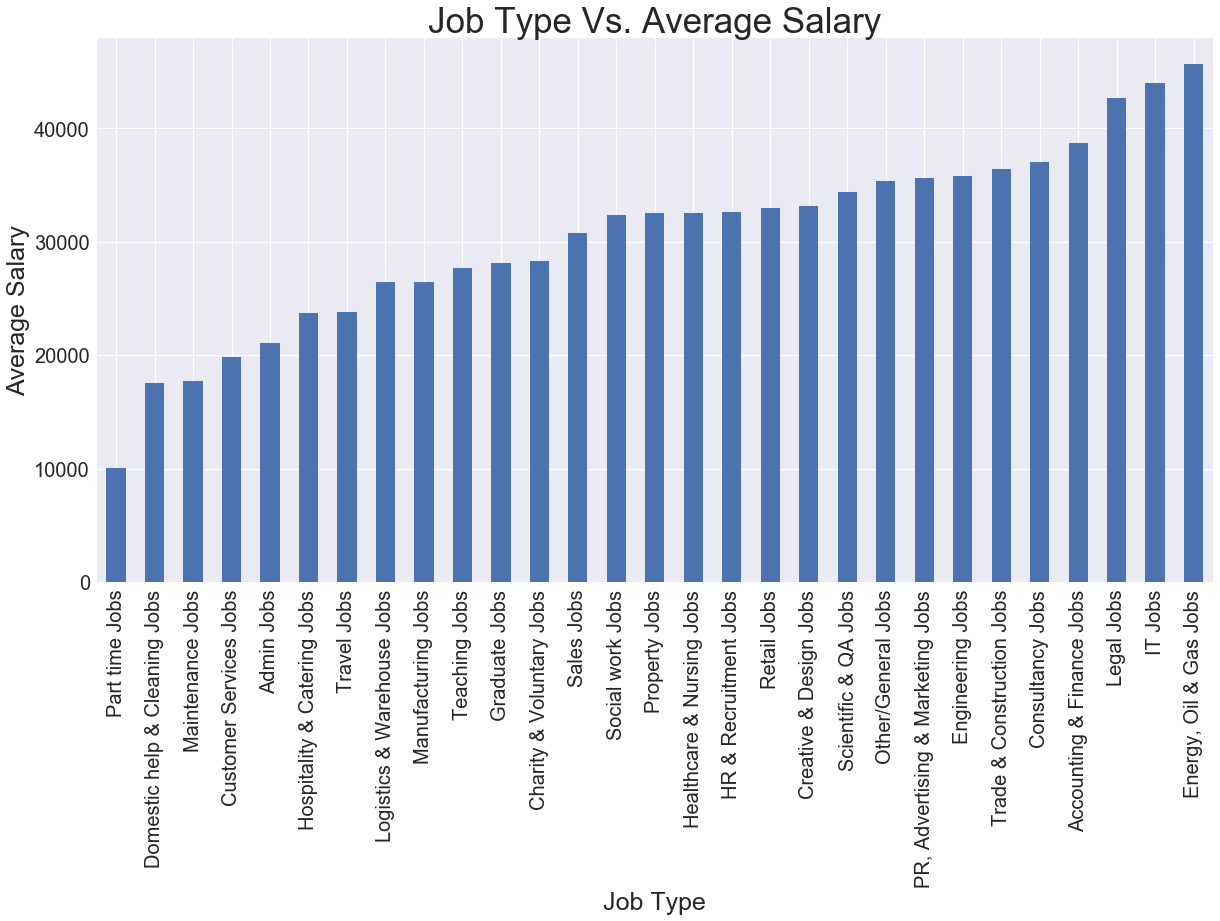

In [75]:
fig, ax=plt.subplots(figsize=(20,10))
df.groupby('Category')['SalaryNormalized'].mean().sort_values().plot(kind='bar',fontsize=20)
plt.xlabel('Job Type',fontsize=25)
plt.ylabel('Average Salary',fontsize=25)
plt.title('Job Type Vs. Average Salary',fontsize=35)

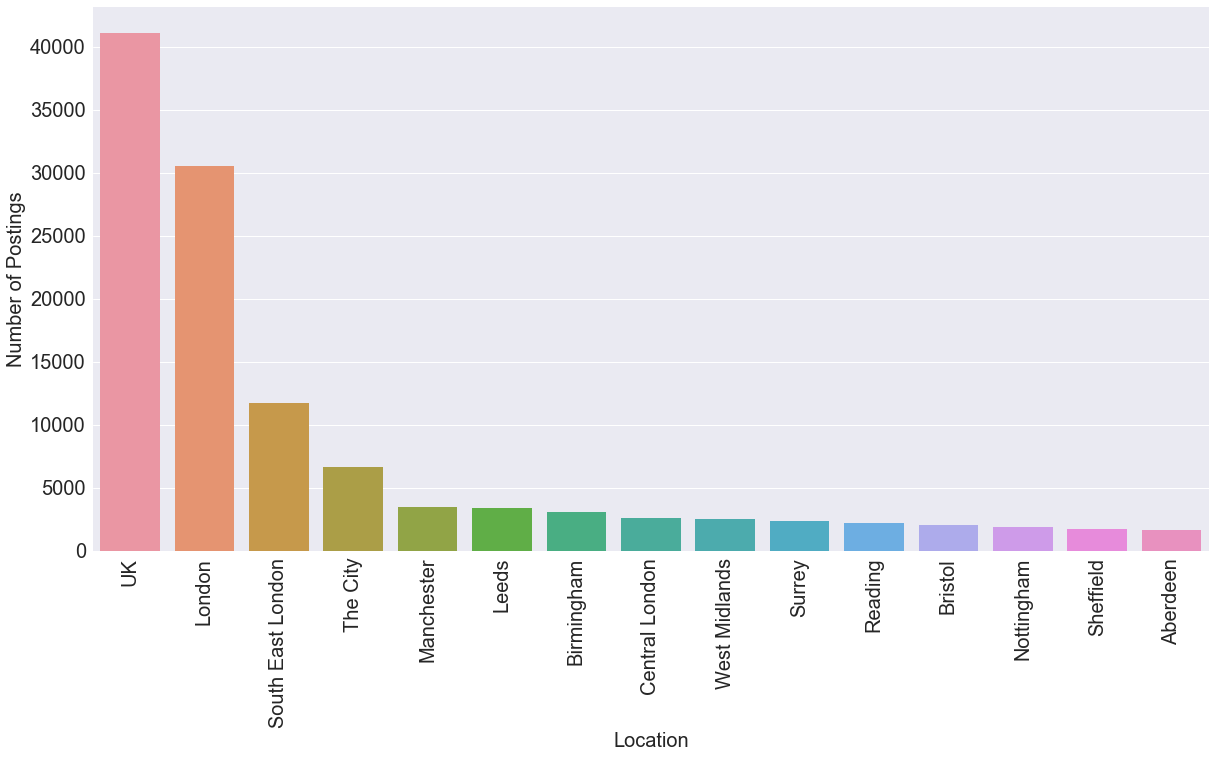

In [72]:
locationDF=pd.DataFrame(df.groupby('LocationNormalized').size().sort_values(ascending=False).head(15)).rename(columns={0:'Number of Jobs'}).reset_index()
locationDF
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(locationDF.iloc[:,0],locationDF.iloc[:,1])
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of Postings',fontsize=20)
plt.xlabel('Location',fontsize=20)

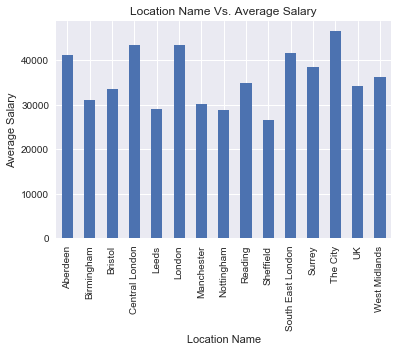

In [73]:
Top_Location_Avg_Salary=df[df.LocationNormalized.isin(list(locationDF.LocationNormalized))].groupby('LocationNormalized')['SalaryNormalized'].mean()
Top_Location_Avg_Salary.plot(kind='bar')
plt.xlabel('Location Name')
plt.ylabel('Average Salary')
plt.title('Location Name Vs. Average Salary')

In [13]:
from collections import Counter
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
text = ' '.join(
    df['Title'].replace(r'[^0-9a-zA-Z]+',' ',regex=True)
    .fillna('').str.lower()
)
top_job_title_terms = Counter([w for w in text.split(' ') if w not in cachedStopWords]).most_common(50)

In [14]:
labels, values=zip(*top_job_title_terms)

In [81]:
topjobdf=pd.DataFrame(data={'labels':labels,'values':values},columns=['labels','values'])
topjobdf=topjobdf.drop(3)

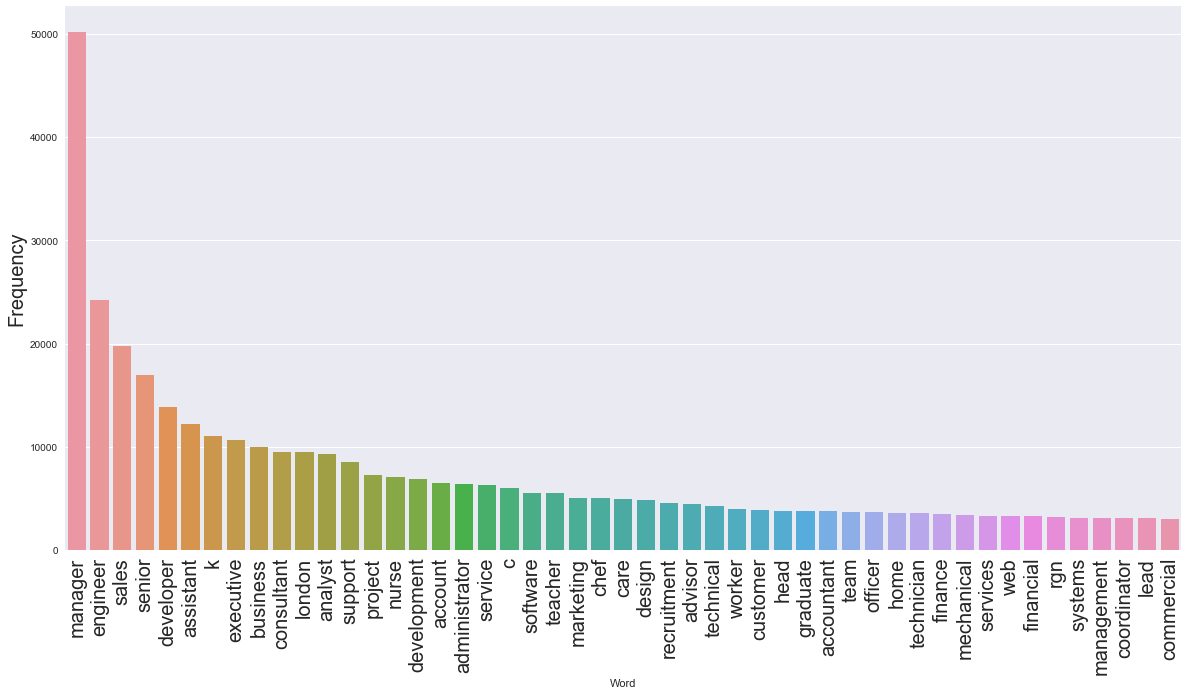

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='labels',y='values',data=topjobdf)
plt.xticks(rotation='vertical',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Word')

In [95]:
def title_keywords(keyword):
    result=df[df['Title'].str.contains(keyword)]['SalaryNormalized'].mean()
    return result

In [99]:
topjobdf['average_salary']=topjobdf['labels'].apply(title_keywords)

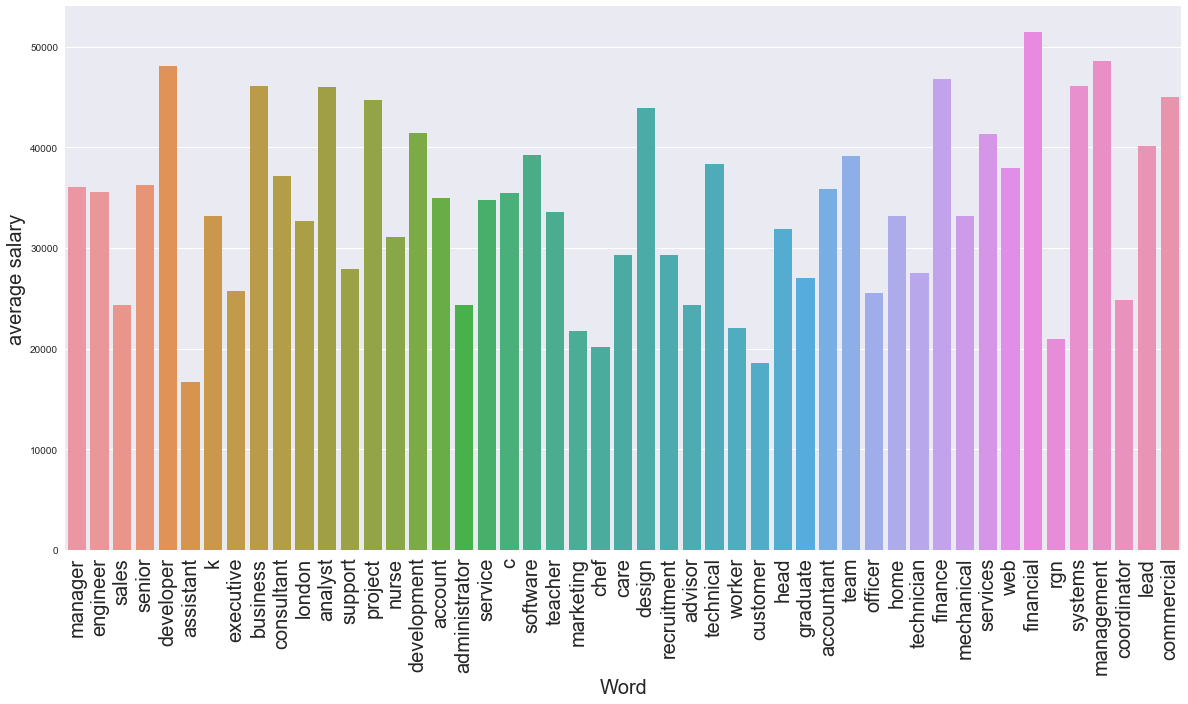

In [104]:
fig, ax=plt.subplots(figsize=(20,10))
sns.barplot(x='labels',y='average_salary',data=topjobdf)
plt.xticks(rotation='vertical',fontsize=20)
plt.ylabel('average salary',fontsize=20)
plt.xlabel('Word',fontsize=20)

# Tokenization and Text Processing with spaCy

In [17]:
import spacy
nlp=spacy.load('en')

In [18]:
df['tokenized']=[nlp(row) for row in df['FullDescription']]

In [19]:
def alpha_numeric(sentence):
    tokens=[tok for tok in sentence if tok.is_alpha]
    return tokens

In [20]:
df['alpha_numeric']=df['tokenized'].apply(alpha_numeric)

In [21]:
df['alpha_numeric_length']=df['alpha_numeric'].apply(len)

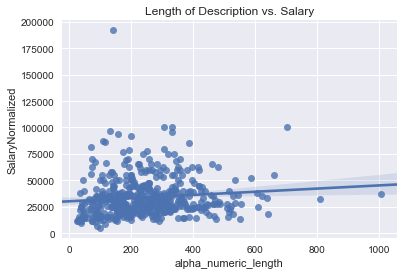

In [108]:
sdf=df.sample(500)
sns.regplot(sdf.alpha_numeric_length,sdf.SalaryNormalized)
plt.title('Length of Description vs. Salary')

In [23]:
def ents(tokens):
    entities=[ent for ent in tokens.ents]
    return entities

In [24]:
df['entities']=df['tokenized'].apply(ents)

In [25]:
df['sum_ents']=df['entities'].apply(len)+

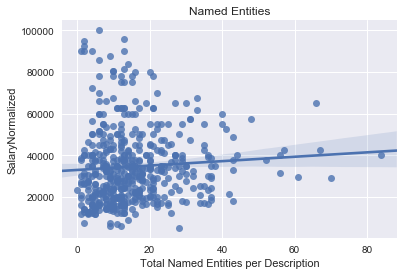

In [110]:
sdf=df.sample(500)
sns.regplot(sdf.sum_ents,sdf.SalaryNormalized)
plt.title('Named Entities')
plt.xlabel('Total Named Entities per Description')

# Machine Learning

In [9]:
df.SalaryNormalized.describe()

count    244767.000000
mean      34122.543349
std       17640.571032
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64

In [10]:
def binary_salary(x):
    if x>30000.0:
        result=1
    else:
        result=0
    return result

In [11]:
df['binary_salary']=df['SalaryNormalized'].apply(binary_salary)

In [12]:
mdf=df.sample(1000)

In [13]:
mdf['binary_salary']=mdf['SalaryNormalized'].apply(binary_salary)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=mdf['FullDescription']+' '+mdf['Title']+' '+mdf['LocationNormalized']+' '+mdf['Category']
y=mdf['binary_salary']

In [16]:
X=df['FullDescription']+' '+df['Title']+' '+df['LocationNormalized']+' '+df['Category']
y=df['binary_salary']

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=20)

### Running Tfidf without parameters

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
tfidf_vectorizer=TfidfVectorizer()
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)

print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ',clf.score(tfidf_train,ytrain))

testing score:  0.804206432213
training score:  0.812670570611


### Remove stopwords

In [117]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ' ,clf.score(tfidf_train,ytrain))

testing score:  0.805562818669
training score:  0.814141359118


### Adjusting ngram parameter

In [119]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(1,2))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ' ,clf.score(tfidf_train,ytrain))

testing score:  0.839014903909
training score:  0.868909165191


In [120]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(2,2))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ' ,clf.score(tfidf_train,ytrain))

testing score:  0.851810694208
training score:  0.894609832494


In [19]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(2,3))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ' ,clf.score(tfidf_train,ytrain))

testing score:  0.864230618381
training score:  0.920735394253


In [23]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(3,4))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ' ,clf.score(tfidf_train,ytrain))

testing score:  0.877434958818
training score:  0.95699305461


In [24]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(2,4))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ' ,clf.score(tfidf_train,ytrain))

testing score:  0.868937115963
training score:  0.934184938036


In [25]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(2,5))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
print ('testing score: ' ,clf.score(tfidf_test,ytest))
print ('training score: ' ,clf.score(tfidf_train,ytrain))

testing score:  0.871813308929
training score:  0.941609696309


### Randomforest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.993256162331
testing score:  0.844505817754


### max_df parameter

In [42]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=RandomForestClassifier()
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.994558082528
testing score:  0.84654856844


In [28]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7,ngram_range=(2,3))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=RandomForestClassifier()
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.992956557265
testing score:  0.847447378742


### SVM

In [29]:
from sklearn.svm import LinearSVC

In [30]:
tfidf_vectorizer=TfidfVectorizer()
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=LinearSVC()
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.922554814109
testing score:  0.876323702445


In [31]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7,ngram_range=(2,3))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=LinearSVC()
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.995560397658
testing score:  0.913387370898


In [37]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.01,0.1,0.5,1,3,5]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(LinearSVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [38]:
tfidf_X=tfidf_vectorizer.fit_transform(X)
svc_param_selection(tfidf_X,y,5)

{'C': 3}

In [32]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7,ngram_range=(2,3))
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=LinearSVC(C=3)
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.998294974806
testing score:  0.914498627272


### running the model without 'Title' and 'LocationNormalized' column

In [34]:
X2=df['FullDescription']+' '+df['Category']
y=df['binary_salary']

In [35]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X2,y,test_size=0.25,random_state=20)

In [36]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7,ngram_range=(2,3))
tfidf_train2=tfidf_vectorizer.fit_transform(xtrain2)
tfidf_test2=tfidf_vectorizer.transform(xtest2)
clf=LinearSVC(C=3)
clf.fit(tfidf_train2,ytrain2)
print ('training score: ',clf.score(tfidf_train2,ytrain2))
print ('testing score: ', clf.score(tfidf_test2,ytest2))

training score:  0.997352580689
testing score:  0.910560203948
